# 0. Introduction

My attempt at the following Kaggle competition: "Titanic - Machine Learning from Disaster", which can be found <a href="https://www.kaggle.com/c/titanic/leaderboard" >here</a>.

This notebook includes:<br>
>[**1.0** Data Exploration](#section_1)<br>
 [**2.0** Feature Engineering](#section_2)<br>
 [**3.0** Model](#section_3)

In [340]:
#Imports

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set_palette("pastel")

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from statistics import mean
import warnings
warnings.filterwarnings('ignore')

In [341]:
# Functions

def display_missing(df):
    print('{}({} entries)'.format(df.name, df.shape[0]))
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
def print_columns(df):
    print("\n{} Columns in {}:".format(df.shape[1], df.name))
    for col in df.columns.tolist():
        print(col)
    print("\n")
    
def split_df(df, index):
    return df.loc[:index], all_data.loc[index+1:].drop(['Survived'], axis=1)

def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def find_prediction_accuracy(true_array, pred_array):
    count = 0
    for i in range(len(true_array)):
        if true_array[i] == pred_array[i]:
            count += 1
    return count/len(true_array)

In [342]:
# Read and store data

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
all_data = pd.concat([train_data, test_data], sort=True).reset_index(drop=True)
train_data.name = 'Training Data'
test_data.name = 'Test Data'
all_data.name = 'All Data'
dfs = [train_data, test_data, all_data]

<a id="section_1"></a>

## 1.0 Data Exploration

There are `11` features in this dataset, and also the class feature: `Survived`.

The shape of the sets and features are:

In [343]:
# Initial exploration

for df in dfs:
    print("Number of entries in {} = {}".format(df.name, df.shape[0]))
    
print_columns(train_data)
print_columns(test_data)

Number of entries in Training Data = 891
Number of entries in Test Data = 418
Number of entries in All Data = 1309

12 Columns in Training Data:
PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked



11 Columns in Test Data:
PassengerId
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked




### 1.1 Feature Overview

<ul>
    <li> <code>PassengerId</code> is the primary key of this dataset and is used to distinguish passengers, it holds no signifigance to our predictions of course and will be ommitted.</li>
    <li><code>Survived</code> is the target feature we are trying to classify, it is a binary feature with <code>0</code> indicating the passenger did not survive and <code>1</code> indicating that they did survive.</li>
    <li><code>Pclass</code> refers to the class which this passenger belonged to, its possible values are <code>1</code> for 1st class, <code>2</code> for 2nd class and <code>3</code> for third class.</li>
    <li><code>Name</code> is self explanatory.</li>
    <li><code>Sex</code> either <code>male</code> or <code>female</code></li>
    <li><code>Age</code> Age in years.</li>
    <li><code>SibSp</code> Number of siblings and spouse aboard the Titanic.</li>
    <li><code>Parch</code> Number of parents and children aboard the Titanic.</li>
    <li><code>Ticket</code> The passenger's ticket number.</li>
    <li><code>Fare</code> Fare paid by passenger.</li>
    <li><code>Cabin</code> Cabin number of passenger.</li>
    <li><code>Embarked</code> Port on which the passenger boarded the titanic, possible values: <code>S</code> = Southhampton, <code>Q</code> = Queenstown, <code>C</code> = Cherbourg.</li>
</ul>

In [344]:
# First five entires in the training set

print(all_data.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450  


### 1.2 Null Data

As we can see there are many features with null elements recorded, these will have to filled in as best as possible for accurate results.

In [345]:
# Info for both sets, shows columns data type and number of null elements

print(train_data.info(), "\n")
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   P

In [346]:
# View number of null elements

for df in dfs:
    display_missing(df)

Training Data(891 entries)
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Data(418 entries)
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0


All Data(1309 entries)
Age column missing values: 263
Cabin column missing values: 1014
Embarked column missing values: 2
Fare column missing values: 1
Name column missing values: 0
Parch column missing values: 0


There are `1014` missing values in the `Cabin` feature amounting to `77%` of the data, I will simply drop this feature.<br>
However I am sure the remaining data could positively contribute to predictions, I am happy enough with the reults achieved without it.

In [347]:
all_data.drop('Cabin', axis=1, inplace=True)

In [348]:
# Next examine the age column

all_corr_df = all_data.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
all_corr_df.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
all_corr_df[all_corr_df['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
6,Age,Age,1.000000
9,Age,Pclass,0.408106
17,Age,SibSp,0.243699
22,Age,Fare,0.178740
25,Age,Parch,0.150917
29,Age,Survived,0.077221
41,Age,PassengerId,0.028814


In [349]:
# Intuition says age, pclass and sex will be related, we can see here the median age is distinct across pclass for each gender

age_by_pclass_sex = all_data.groupby(['Sex', 'Pclass']).median()['Age']
print(age_by_pclass_sex)

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64


In [350]:
# Fill in the missing age values according to the median age for that pclass and sex

all_data['Age'] = all_data.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [351]:
# Following research done by a kaggle user, the two missing 'embarked' values in the dataset can be filled in as 'S'

all_data['Embarked'] = all_data['Embarked'].fillna('S')

In [352]:
# There is only one fare value missing, fill this in with the median value

all_data['Fare'] = all_data['Fare'].fillna(all_data.Fare.median())

In [353]:
# View number of null elements
train_data, test_data = split_df(all_data, 890)
train_data.name = 'Training Set'
test_data.name = 'Test Set'
dfs = [train_data, test_data]

for df in dfs:
    display_missing(df)

Training Set(891 entries)
Age column missing values: 0
Embarked column missing values: 0
Fare column missing values: 0
Name column missing values: 0
Parch column missing values: 0
PassengerId column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Survived column missing values: 0
Ticket column missing values: 0


Test Set(418 entries)
Age column missing values: 0
Embarked column missing values: 0
Fare column missing values: 0
Name column missing values: 0
Parch column missing values: 0
PassengerId column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Ticket column missing values: 0




In [354]:
# Now all missing features are filled, let us examine the data types again

print(train_data.info(), "\n")
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Embarked     891 non-null    object 
 2   Fare         891 non-null    float64
 3   Name         891 non-null    object 
 4   Parch        891 non-null    int64  
 5   PassengerId  891 non-null    int64  
 6   Pclass       891 non-null    int64  
 7   Sex          891 non-null    object 
 8   SibSp        891 non-null    int64  
 9   Survived     891 non-null    float64
 10  Ticket       891 non-null    object 
dtypes: float64(3), int64(4), object(4)
memory usage: 76.7+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    float64
 1   Embarked     418 non-null    object 
 2 

<a id="section_2"></a>

## 2.0 Feature Engineering

There is some work yet to be done with the remaining features before we can begin modelling.<br>

The following columns have the `object` datatype and will need to be converted accordingly: `Embarked`, `Name`, `Sex` and `Ticket`.

It would be helpful also to bin the features that have a <code>float64</code> datatype: `Age` and `Fare`.

However first let us try to group similiar features together and eliminate any non-informative ones, starting with the `Parch` and `SibSp` features.

In [355]:
print(all_corr_df[all_corr_df['Feature 1'] == 'SibSp'], "\n")
print(all_corr_df[all_corr_df['Feature 1'] == 'Parch'])

   Feature 1    Feature 2  Correlation Coefficient
1      SibSp        SibSp                 1.000000
12     SibSp        Parch                 0.373587
18     SibSp          Age                 0.243699
24     SibSp         Fare                 0.160238
31     SibSp       Pclass                 0.060832
34     SibSp  PassengerId                 0.055224
37     SibSp     Survived                 0.035322 

   Feature 1    Feature 2  Correlation Coefficient
3      Parch        Parch                 1.000000
11     Parch        SibSp                 0.373587
19     Parch         Fare                 0.221539
26     Parch          Age                 0.150917
28     Parch     Survived                 0.081629
44     Parch       Pclass                 0.018322
46     Parch  PassengerId                 0.008942


### 2.1 Family Size

These two features are highly correlated with each other, and also with the `Age` and `Fare` features. 

In [356]:
print("Parents & Children\nMin = {}".format(all_data.Parch.min()))
print("Max = {}".format(all_data.Parch.max()))
print("Mean = {}".format(all_data.Parch.mean()))
print("Median = {}".format(all_data.Parch.median()))

print("\nSiblings & Spouse\nMin = {}".format(all_data.SibSp.min()))
print("Max = {}".format(all_data.SibSp.max()))
print("Mean = {}".format(all_data.SibSp.mean()))
print("Median = {}".format(all_data.SibSp.median()))

Parents & Children
Min = 0
Max = 9
Mean = 0.3850267379679144
Median = 0.0

Siblings & Spouse
Min = 0
Max = 8
Mean = 0.4988540870893812
Median = 0.0


Due to the similarities between these features we will group them together using the following methodology:<br>

`Family_Size` = `Parch` + `SibSp`

And by binning the feature: `0` = `Alone`, `1,2,3` = `Small`, `4,5` = `medium` and `5+` = `Large`

We can see the effect of this by graphing the feature against the survival rate.

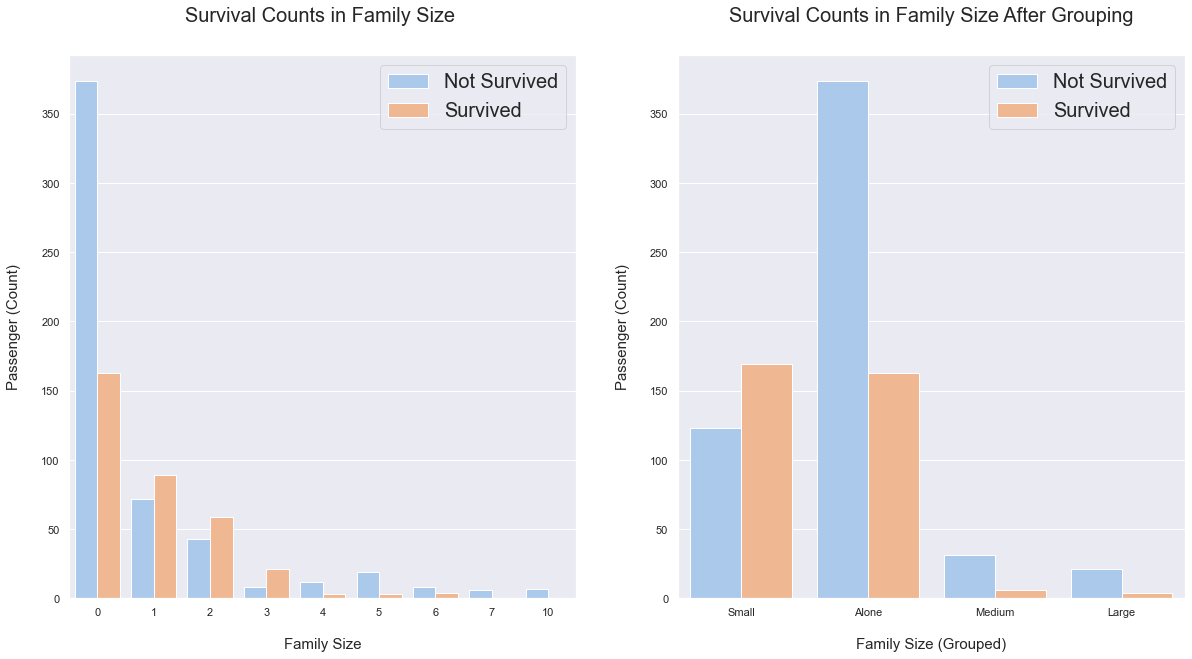

In [357]:
# I will combine the 'SibSp' and 'Parch' features into one feature: 'Family Size'.
# As they seem to convey very similiar information and are highly correlated this makes sense to me.

all_data['Family_Size'] = all_data['SibSp'] + all_data['Parch']

fig, axs = plt.subplots(figsize=(20, 10), ncols=2, nrows=1)


sns.countplot(x='Family_Size', hue='Survived', data=all_data, ax=axs[0])

axs[0].set_title('Survival Counts in Family Size ', size=20, y=1.05)
axs[1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

family_map = {0: 'Alone', 1: 'Small', 2: 'Small', 3: 'Small', 4: 'Medium', 5: 'Medium', 6: 'Large', 7: 'Large', 10: 'Large'}
all_data['Family_Size_Grouped'] = all_data['Family_Size'].map(family_map)



sns.countplot(x='Family_Size_Grouped', hue='Survived', data=all_data, ax=axs[1])
axs[1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
axs[0].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
axs[1].set_xlabel('Family Size (Grouped)', size=15, labelpad=20)
axs[1].set_ylabel('Passenger (Count)', size=15, labelpad=20)
axs[0].set_xlabel('Family Size', size=15, labelpad=20)
axs[0].set_ylabel('Passenger (Count)', size=15, labelpad=20)


plt.show()

### 2.2 Fare

As this is a continuous feature it would be wise to bin it, we will cut the `Fare` feature into `10` quantiles and use a similiar graph as before against survival to see the effect if this transformation.

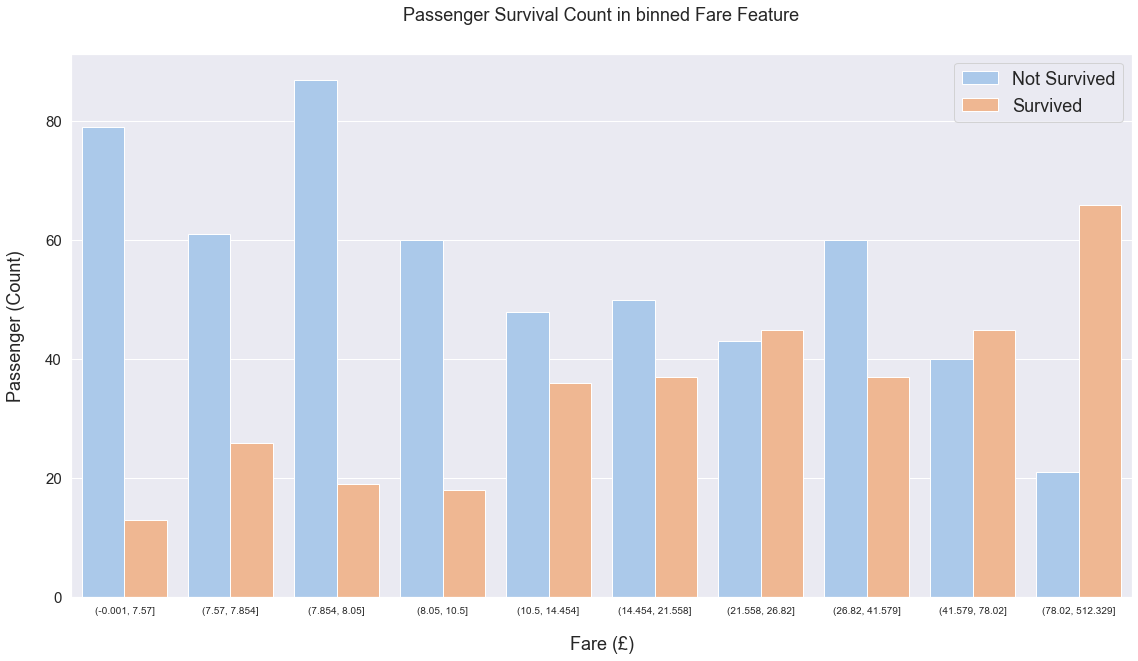

In [358]:
# Examine the effect of binning the 'Fare' feature

all_data['Fare'] = pd.qcut(all_data['Fare'], 10)

fig, axs = plt.subplots(figsize=(19, 10))
sns.countplot(x='Fare', hue='Survived', data=all_data)

plt.xlabel('Fare (£)', size=18, labelpad=20)
plt.ylabel('Passenger (Count)', size=18, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 18})
plt.title('Passenger Survival Count in binned Fare Feature', size=18, y=1.05)

plt.show()

### 2.3 Age

As this is also a continuous feature it would be wise to bin it, we will cut the `Age` feature into `10` quantiles and use a similiar graph as before against survival to see the effect if this transformation.

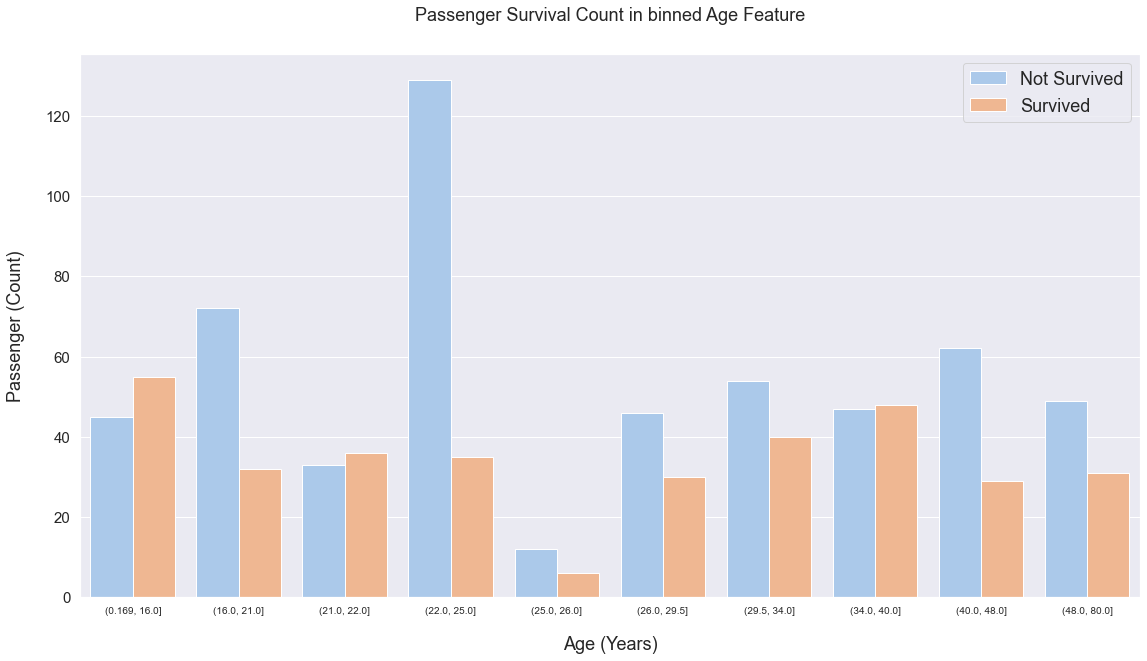

In [359]:
# Next the binned 'Age' feature

all_data['Age'] = pd.qcut(all_data['Age'], 10)

fig, axs = plt.subplots(figsize=(19, 10))
sns.countplot(x='Age', hue='Survived', data=all_data)

plt.xlabel('Age (Years)', size=18, labelpad=20)
plt.ylabel('Passenger (Count)', size=18, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 18})
plt.title('Passenger Survival Count in binned Age Feature', size=18, y=1.05)

plt.show()

### 2.4 Removing Unhelpful Features

Following other user's work online I understand there is interesting data to be gleamed from the `Name` and `Ticket` features, in particular be examing frequency and then inferring the survival rate of particular family names. My predictions were satisfactory without the help of these features so I decided to drop them.

In [360]:
all_data.drop('Ticket', axis=1, inplace=True)
all_data.drop('Name', axis=1, inplace=True)

### 2.5 Feature Encoding

Here we encode the non-numeric and categorical features.

In [361]:
non_numeric_features = ['Embarked', 'Sex', 'Family_Size_Grouped', 'Age', 'Fare']
train_data, test_data = split_df(all_data, 890)
dfs = [train_data, test_data]
for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])

In [362]:
cat_features = ['Pclass', 'Sex', 'Family_Size_Grouped', 'Embarked']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

train_data = pd.concat([train_data, *encoded_features[:4]], axis=1)
test_data = pd.concat([test_data, *encoded_features[4:]], axis=1)

In [363]:
all_data = concat_df(train_data, test_data)
drop_cols = ['Embarked', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Family_Size', 'Family_Size_Grouped']

all_data.drop(columns=drop_cols, inplace=True)

all_data.head()

,Age,Embarked_1,Embarked_2,Embarked_3,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Survived
0,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0.0,0.0,1.0,0.0,1.0,0.0
1,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,8,1.0,0.0,0.0,1.0,0.0,1.0
2,4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2,0.0,0.0,1.0,1.0,0.0,1.0
3,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,8,1.0,0.0,0.0,1.0,0.0,1.0
4,7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,1.0,0.0


<a id="section_3"></a>

## 3.0 Model

We use a random forest classifier for this dataset.

First we operate on the provided `training data` only by splitting it into `66.6%` training and `33.3%` testing. We repeat this process `10` times and find the average prediction accuracy over these tests. This helped fine tune the process without the added hassle of uploading each set of predicitons to *Kaggle*.

In [364]:
# Remove unneccesary data and store the target feature in y, the classifiers in X

train_data = train_data.drop(columns=drop_cols)
y = train_data['Survived'].values
train_data = train_data.drop('Survived', axis=1)
X = StandardScaler().fit_transform(train_data)

In [366]:
# Find accuracy over 10 repetitions on the provided training data

overall_acc = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    #print('X_train shape: {}'.format(X_train.shape))
    #print('y_train shape: {}'.format(y_train.shape))
    #print('X_test shape: {}'.format(X_test.shape))
    #print('y_test shape: {}'.format(y_test.shape))
    forest_model = RandomForestClassifier(n_estimators=1750) 


    forest_model.fit(X_train,y_train)

    y_pred=forest_model.predict(X_test)
    pred_acc = find_prediction_accuracy(y_test, y_pred)
    overall_acc.append(pred_acc)
    print("Prediction Accuracy: {}".format(pred_acc))
    
print("Average accuracy over {} repetitions = {}".format(len(overall_acc), mean(overall_acc)))

Prediction Accuracy: 0.8
Prediction Accuracy: 0.7966101694915254
Prediction Accuracy: 0.8203389830508474
Prediction Accuracy: 0.7864406779661017
Prediction Accuracy: 0.823728813559322
Prediction Accuracy: 0.8033898305084746
Prediction Accuracy: 0.7728813559322034
Prediction Accuracy: 0.8033898305084746
Prediction Accuracy: 0.8135593220338984
Prediction Accuracy: 0.7932203389830509
Average accuracy over 10 repetitions = 0.8013559322033899


We are happy with the accuracy achieved thus far, now time to train on the entire training set and find predictions for the test set provided.

In [319]:
# Final prediction & saving in .csv

submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission_df['PassengerId'] = test_data['PassengerId']

X_test = StandardScaler().fit_transform(test_data.drop(columns=drop_cols))
forest_model = RandomForestClassifier(n_estimators=1750) 
forest_model.fit(X,y)
y_pred=forest_model.predict(X_test)

submission_df['Survived'] = y_pred
submission_df.to_csv('submissions.csv', header=True, index=False)
submission_df

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
896,897,0
897,898,0
898,899,0
899,900,1
900,901,0


### Final Thoughts

This achieved a score of `75%` for me on the leaderboard, which I found to be satisfactory. Overall I believe an increase in accuracy could be gleamed from the unused (by me) `Ticker`, `Name` and `Cabin` features.